In [2]:
library(dplyr)
library("ggpubr")
samples<-read.csv("./named/y_cruncher_16*c4.large_25m10runs_labeled.csv")

# 1.analyze set by set
### 1.1 description:
set 1 contains 160 entrys generated from VM 1~16<br>
set 2 contains 150 entrys generated from VM 2~16<br>
.
.
.<br>
set 16 contains 10 entrys generated from VM 16<br>

each entry present 25,000,000digits*10runs of y-cruncher<br>

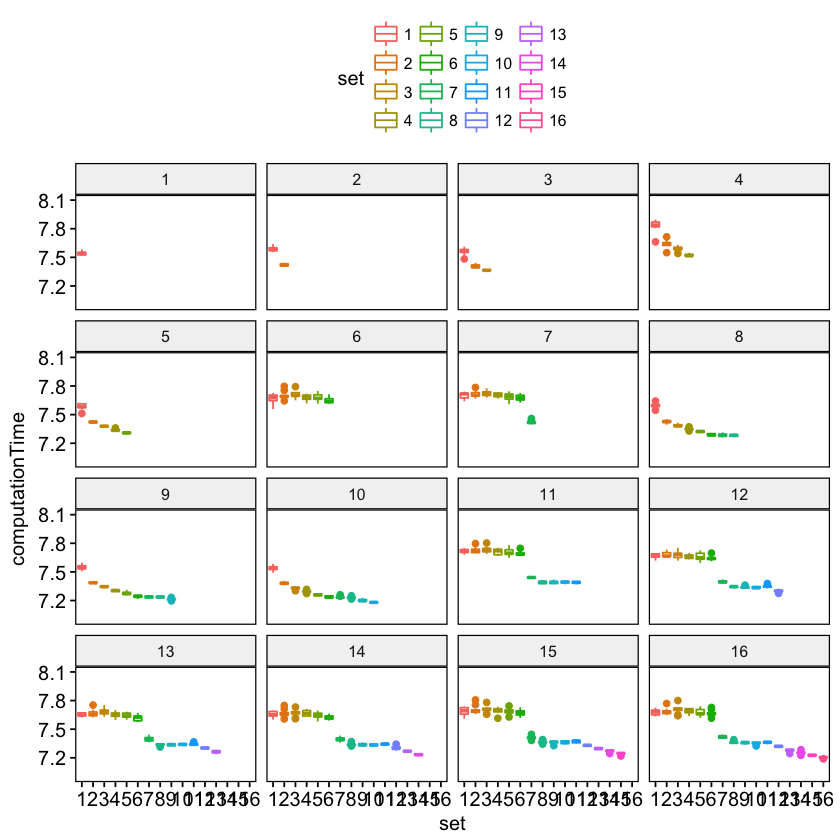

In [42]:
ggboxplot(samples, x = "set", y = "computationTime", 
          color = "set", 
          ylab = "computationTime", xlab = "set",facet.by='vmID')+
coord_cartesian(ylim = c(7, 8.1))

### 1.2 calculations on each set 

In [4]:
statistic_result=data.frame()
for(i in 1:16){
    set=samples[samples$set==i,'computationTime']
    statistic_result=rbind(statistic_result,c(range(set),mean(set),median(set),var(set),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
7.483,9.823,7.664225,7.6390,6.036370e-02,1
7.361,7.807,7.575520,7.6485,2.034487e-02,2
7.302,7.803,7.571371,7.6505,2.678543e-02,3
7.273,7.753,7.559162,7.6460,2.820161e-02,4
7.243,7.780,7.545733,7.6425,3.394460e-02,5
7.216,7.747,7.546300,7.6345,3.292746e-02,6
7.224,7.459,7.363620,7.3980,5.909814e-03,7
7.215,7.417,7.320689,7.3370,3.077588e-03,8
7.179,7.421,7.317525,7.3415,4.569797e-03,9
7.164,7.414,7.328657,7.3465,4.204142e-03,10


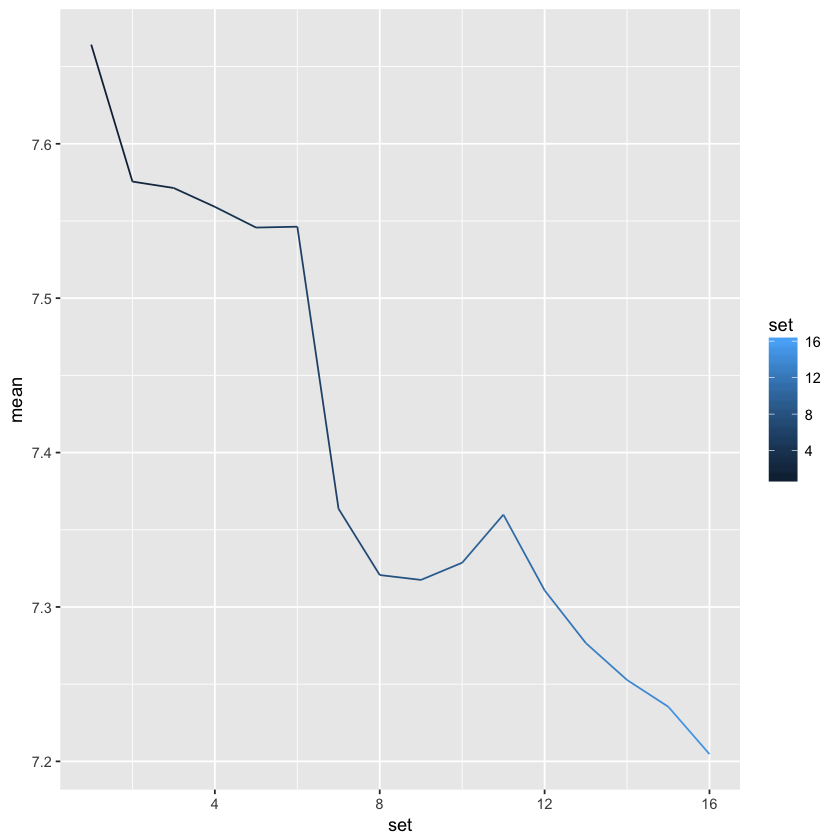

In [5]:
ggplot(statistic_result, aes(x = set, y = mean, colour = set)) +
geom_line()

### 1.3 percentile

In [29]:
q=data.frame(quantile(samples$computationTime,c((1:10)/10)))
names(q)<-c('computationTime')
q

,computationTime
10%,7.2520
20%,7.3050
30%,7.3387
40%,7.3640
50%,7.4010
60%,7.5650
70%,7.6420
80%,7.6750
90%,7.7081
100%,9.8230


In [7]:
p<-data.frame(c((1:10)/10))
names(p)<-c('percentile')
q<-cbind(q,p)
q

,computationTime,percentile
10%,7.2520,0.1
20%,7.3050,0.2
30%,7.3387,0.3
40%,7.3640,0.4
50%,7.4010,0.5
60%,7.5650,0.6
70%,7.6420,0.7
80%,7.6750,0.8
90%,7.7081,0.9
100%,9.8230,1.0


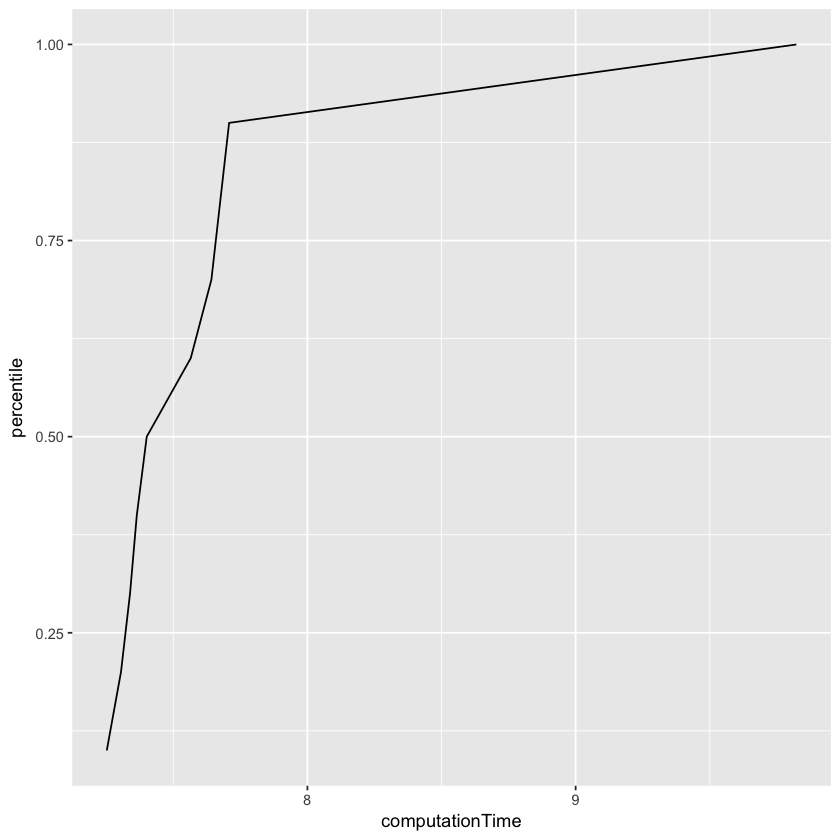

In [8]:
ggplot(q, aes(x =computationTime , y=percentile)) +
  geom_line()

# 2. Another perspective - VM dimension 

### 2.1 VM No.16

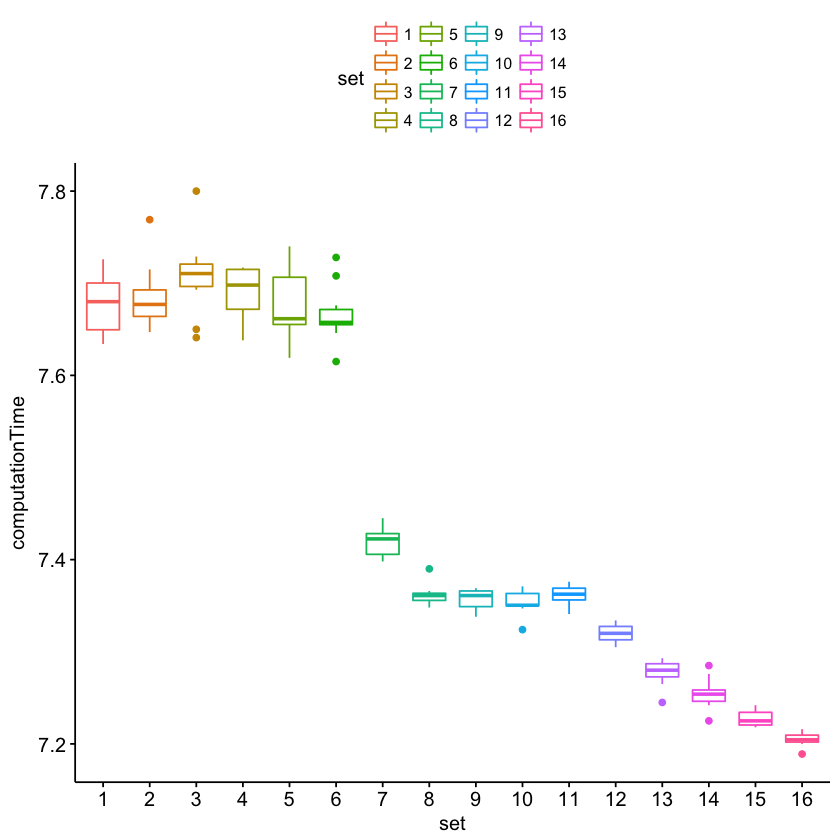

In [9]:
samples<-samples[samples$vmID==16,]
ggboxplot(samples, x = "set", y = "computationTime", 
          color = "set", 
          ylab = "computationTime", xlab = "set")

#### 2.1.1 statistic_result of VM No.16

In [10]:
statistic_result=data.frame()
for(i in 1:16){
    set=samples[samples$set==i,'computationTime']
    statistic_result=rbind(statistic_result,c(range(set),mean(set),median(set),var(set),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
7.634,7.726,7.6771,7.6800,1.009656e-03,1
7.647,7.769,7.6845,7.6770,1.314722e-03,2
7.641,7.800,7.7080,7.7105,1.920667e-03,3
7.638,7.717,7.6896,7.6980,8.187111e-04,4
7.619,7.740,7.6766,7.6615,1.369156e-03,5
7.615,7.728,7.6656,7.6575,1.017600e-03,6
7.398,7.445,7.4189,7.4225,2.352111e-04,7
7.348,7.390,7.3615,7.3610,1.345000e-04,8
7.338,7.369,7.3577,7.3610,1.284556e-04,9
7.324,7.371,7.3533,7.3505,1.844556e-04,10


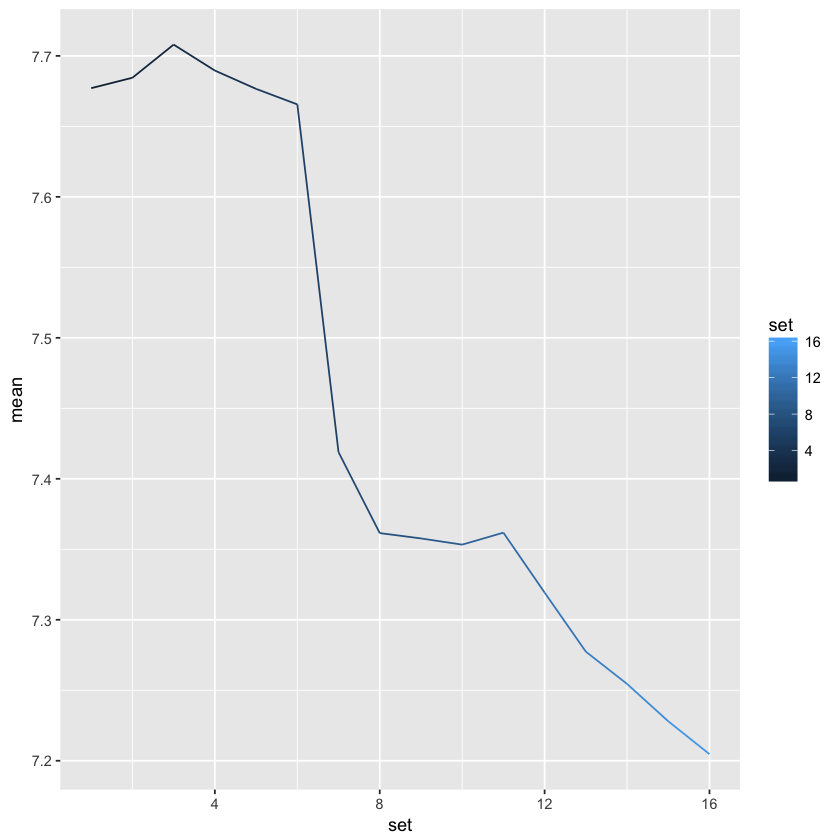

In [11]:
ggplot(statistic_result, aes(x = set, y = mean, colour = set)) +
geom_line()

In [23]:
(7.7-7.35)/7.35*100
(7.35-7.2)/7.2*100

[1] 4.761905

[1] 2.083333

<i><b>I would say that there is visible CPU performance degradation(~5%) when host is above 50% utilization.

#### 2.1.2 percentile of VM No.16

In [12]:
q=data.frame(quantile(samples$computationTime,c((1:10)/10)))
names(q)<-c('computationTime')
q

,computationTime
10%,7.2259
20%,7.2776
30%,7.3275
40%,7.3550
50%,7.3660
60%,7.4260
70%,7.6516
80%,7.6740
90%,7.7093
100%,7.8000


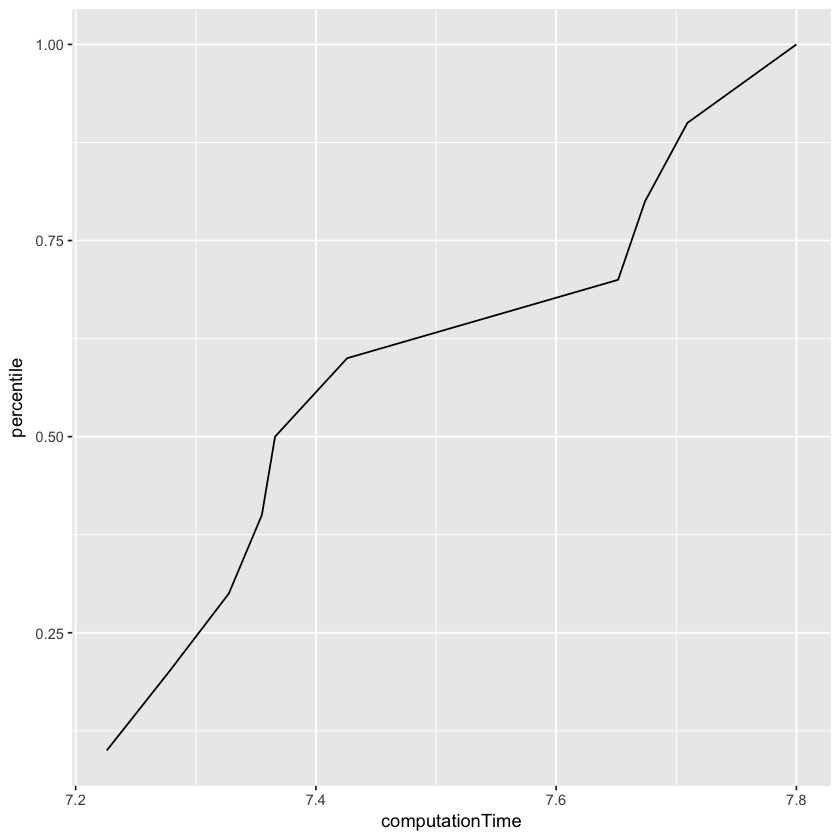

In [13]:
p<-data.frame(c((1:10)/10))
names(p)<-c('percentile')
q<-cbind(q,p)
ggplot(q, aes(x =computationTime , y=percentile)) +
  geom_line()

In [25]:
samples<-read.csv("./named/y_cruncher_16*c4.large_25m10runs_labeled.csv")
library(dplyr)
library("ggpubr")

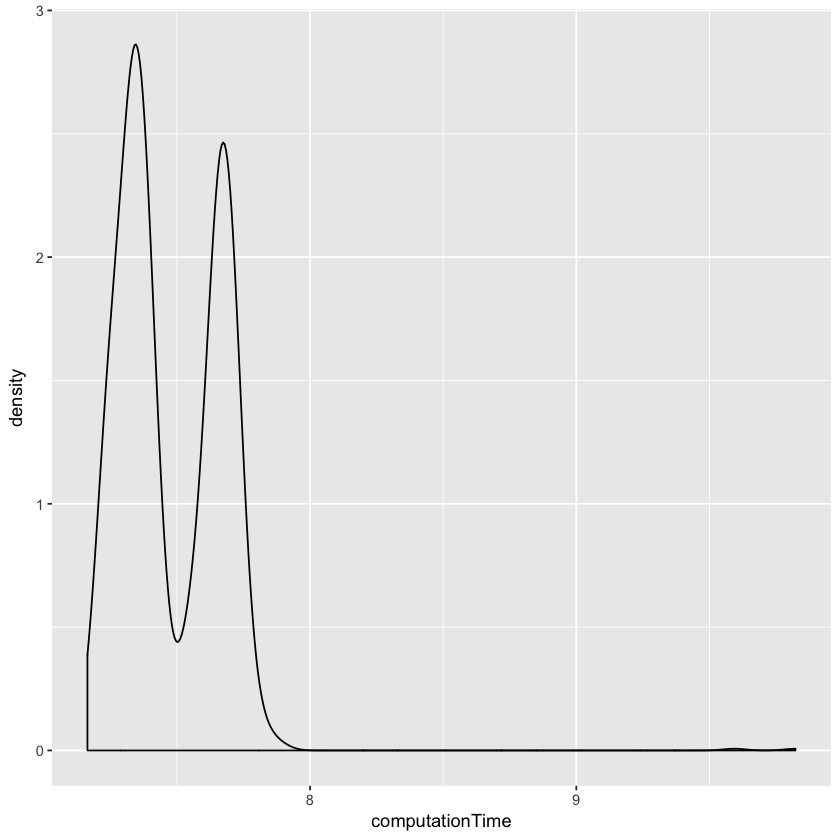

In [26]:
ggplot(samples, aes(x = computationTime))+
geom_density(alpha = 0.3)

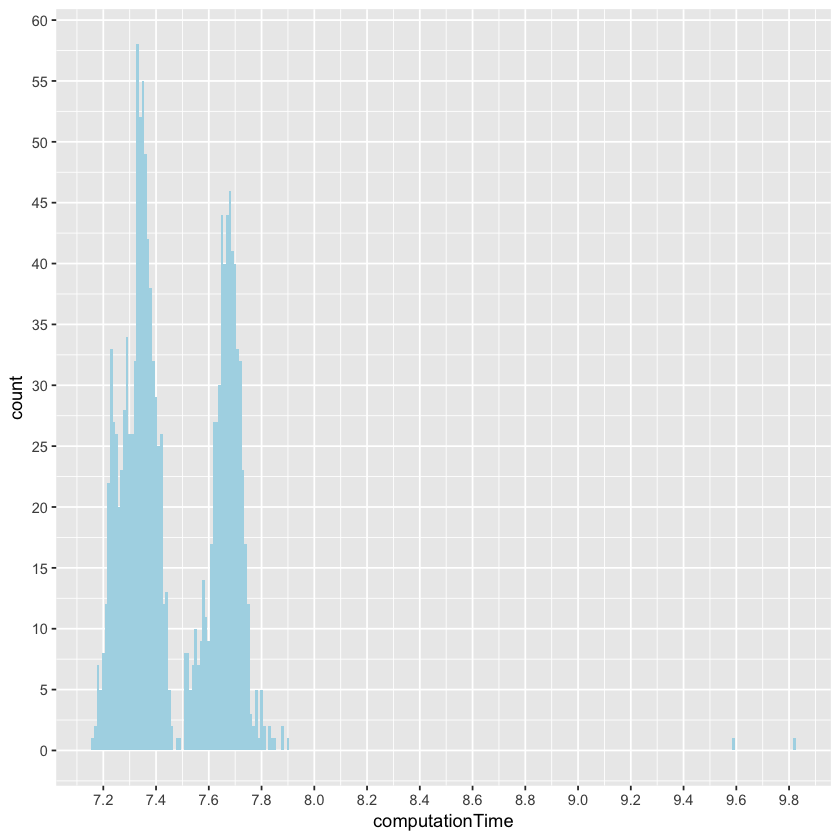

In [27]:
ggplot(samples, aes(x = computationTime)) +
  geom_histogram(binwidth = 0.01, fill = "lightblue",)+
scale_x_continuous(breaks = scales::pretty_breaks(n = 20)) +
scale_y_continuous(breaks = scales::pretty_breaks(n = 10))
    #scale_x_continuous(breaks = round(seq(min(samples$computationTime), max(samples$computationTime), by = 0.3),1))